In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload CSV file
file_path = '/kaggle/input/airline-delay/Airline_Delay_Cause.csv'  # Replace with the path of your file on Kaggle
df = pd.read_csv(file_path)

# Convert 'year' and 'month' columns to datetime type for charts
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# *1)Correlation matrix*

eeee

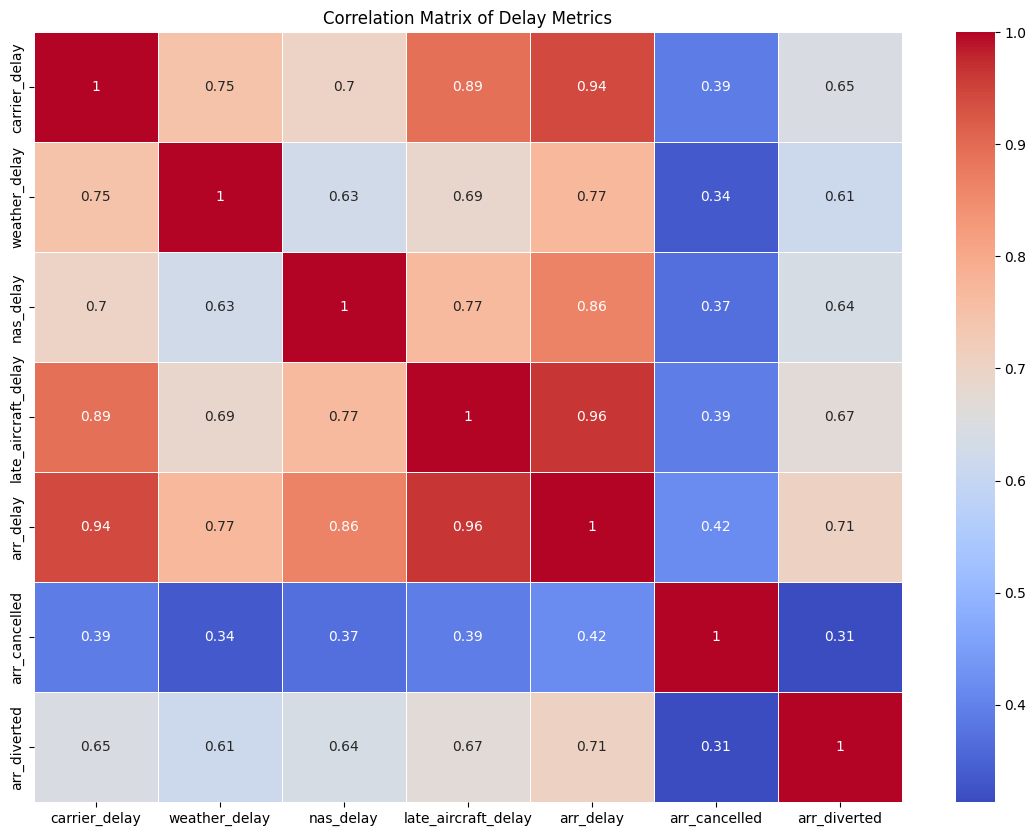

In [2]:
delay_reasons = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
plt.figure(figsize=(14, 10))
corr_matrix = df[delay_reasons + ['arr_delay', 'arr_cancelled', 'arr_diverted']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Delay Metrics')
plt.show()

### Comment on the Correlation Matrix:
The correlation matrix highlights the relationships between various delay metrics. Key insights include:

- **Strong Positive Correlations**:
  - `carrier_delay` has a high correlation with `arr_delay` (0.94), indicating that delays due to carriers significantly impact overall arrival delays.
  - `late_aircraft_delay` also correlates strongly with `arr_delay` (0.96), suggesting that late-arriving aircraft contribute heavily to overall delays.

- **Moderate Correlations**:
  - `weather_delay` and `nas_delay` show moderate correlations with `arr_delay`, at 0.77 and 0.86, respectively, highlighting their roles in delay occurrences but with less impact than carrier and late aircraft delays.

- **Lower Correlations**:
  - `arr_cancelled` and `arr_diverted` exhibit weaker correlations with most delay reasons, indicating they are more independent or influenced by different operational factors.

This matrix is useful for identifying which factors contribute most to overall delays, aiding in prioritizing areas for improvement in airline operations.

## *2) Which carrier has the most delays?*

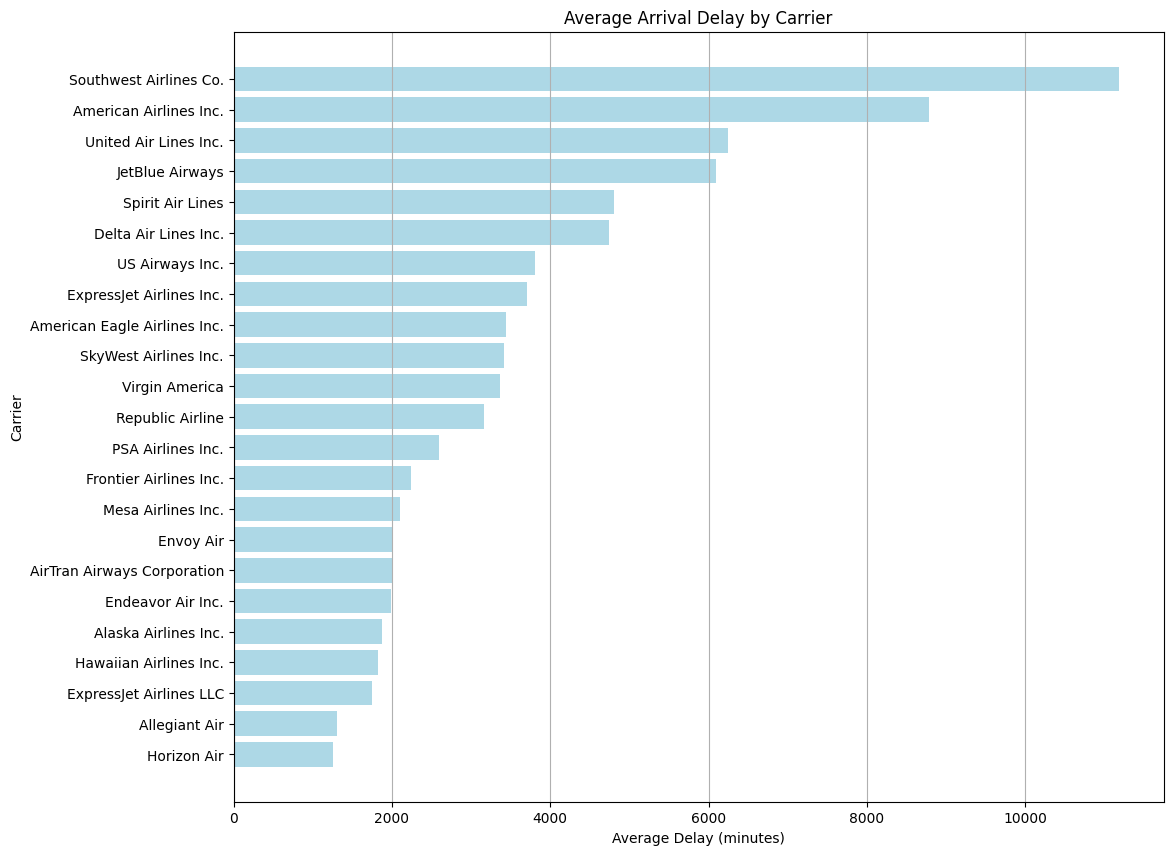

In [3]:
# 2 
average_delay_per_carrier = df.groupby('carrier_name')['arr_delay'].mean().sort_values().reset_index()

plt.figure(figsize=(12, 10))
plt.barh(average_delay_per_carrier['carrier_name'], average_delay_per_carrier['arr_delay'], color='lightblue')
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Carrier')
plt.grid(axis='x')
plt.show()

### Comment on the Chart:
**Southwest Airlines Co.** and **American Airlines Inc.** have the highest average arrival delays, indicating potential operational challenges. Horizon Air and Allegiant Air show the lowest delays, suggesting better on-time performance. This chart highlights varying punctuality across carriers.

## *3) What are the impacts of weather conditions on the delay?*

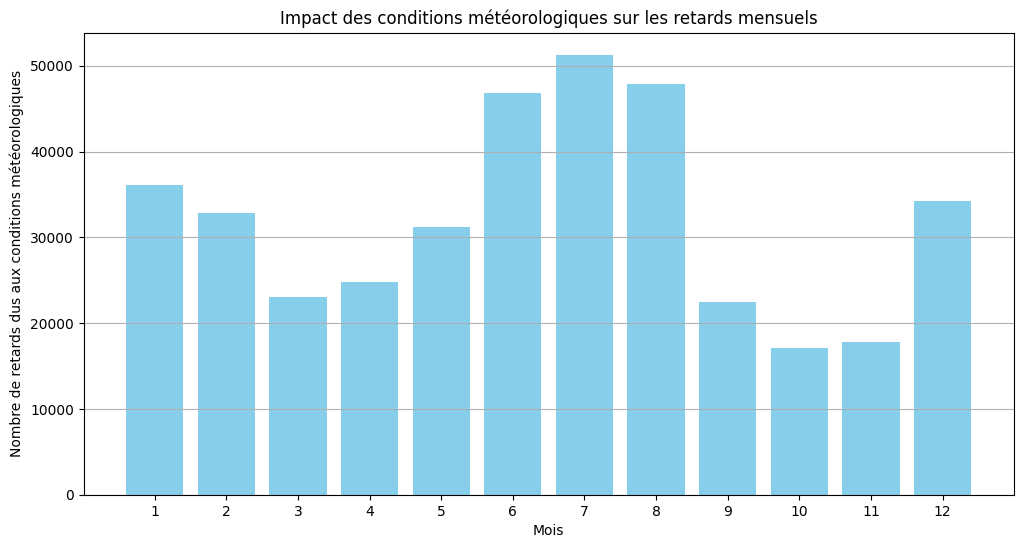

In [4]:
#3 Impact des conditions météorologiques sur les retards mensuels
weather_impact = df.groupby(['month'])['weather_ct'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(weather_impact['month'], weather_impact['weather_ct'], color='skyblue')
plt.title("Impact des conditions météorologiques sur les retards mensuels")
plt.xlabel("Mois")
plt.ylabel("Nombre de retards dus aux conditions météorologiques")
plt.xticks(range(1, 13))
plt.grid(axis='y')
plt.show()

### 3 Comment on the Chart:
The bar chart illustrates the monthly impact of weather on flight delays. The highest delays are observed in the summer months, particularly in July, which could correspond to seasonal storms or increased air traffic. Winter months like December also show significant delays, likely due to snow and adverse weather conditions. This pattern indicates that weather plays a crucial role in flight punctuality, with notable peaks during extreme seasonal conditions.

# *4) What is the sesonality over the years*

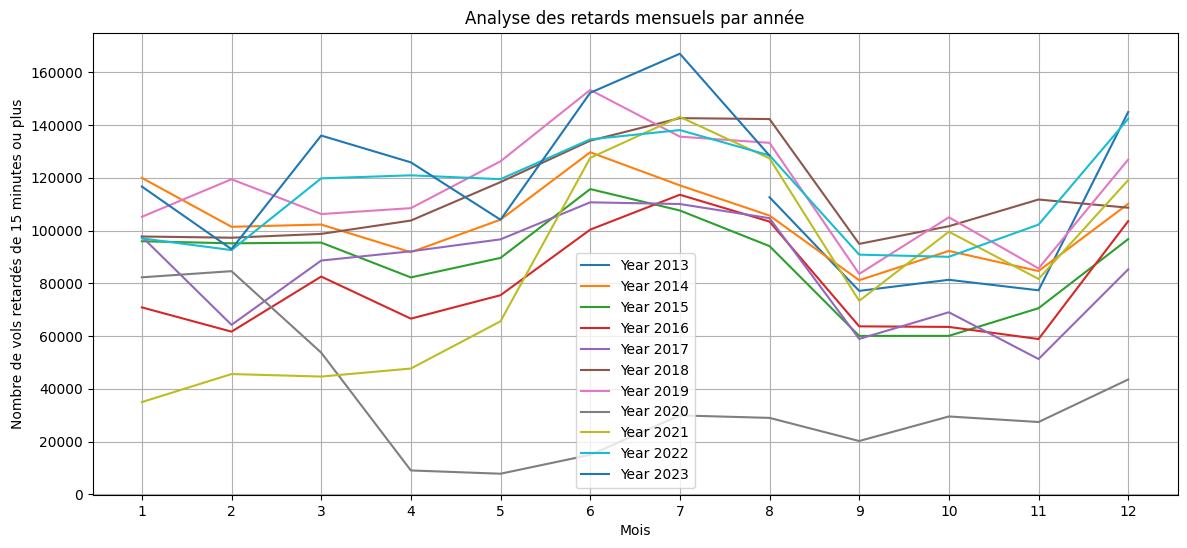

In [5]:
# Graphique des retards mensuels par année
monthly_delays = df.groupby(['year', 'month'])['arr_del15'].sum().reset_index()
plt.figure(figsize=(14, 6))
for year in sorted(monthly_delays['year'].unique()):
    monthly_data = monthly_delays[monthly_delays['year'] == year]
    plt.plot(monthly_data['month'], monthly_data['arr_del15'], label=f'Year {year}')
plt.title('Analyse des retards mensuels par année')
plt.xlabel('Mois')
plt.ylabel('Nombre de vols retardés de 15 minutes ou plus')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

### Comment on the Chart:
The line chart displays the monthly analysis of flight delays across different years. Key observations include consistent seasonal trends, with delays typically peaking during summer and late winter (e.g., December). Notably, 2020 shows a significant drop in delays, aligning with the reduced air traffic during the COVID-19 pandemic. In recent years, such as 2022 and 2023, an upward trend can be seen, indicating a return to higher delay frequencies as flight operations resumed normalcy.


# *5) What is the year with the less delays*

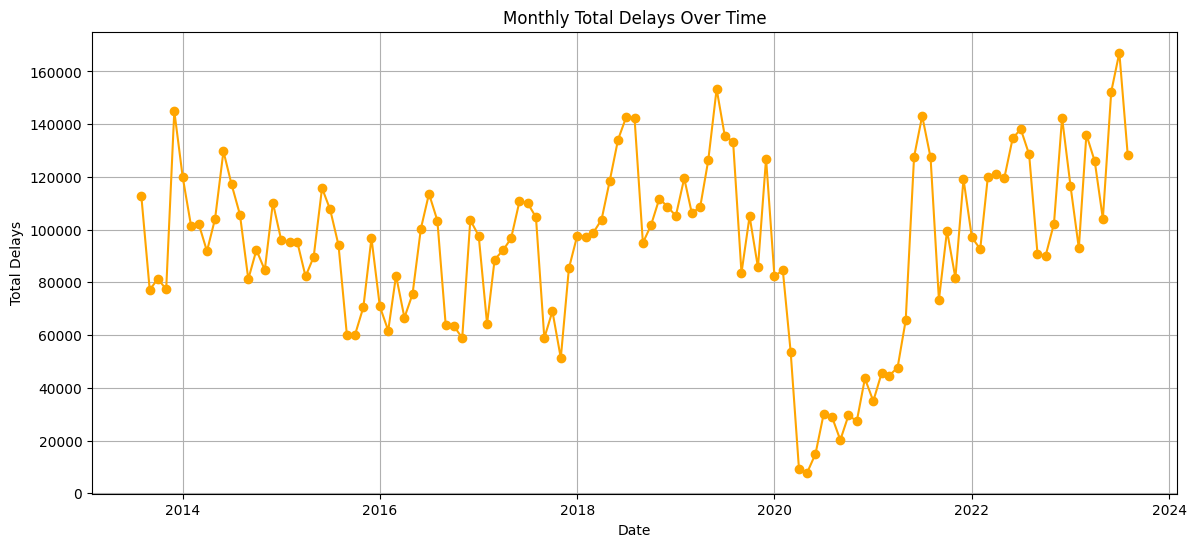

In [6]:
# 5 Fonction pour tracer les tendances mensuelles des retards totaux
def plot_monthly_trend(column, title, ylabel):
    trend_data = df.groupby(['year', 'month'])[column].sum().reset_index()
    trend_data['date'] = pd.to_datetime(trend_data[['year', 'month']].assign(day=1))#
    plt.figure(figsize=(14, 6))
    plt.plot(trend_data['date'], trend_data[column], marker='o', color='orange')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
# Graphiques des retards mensuels totaux
plot_monthly_trend('arr_del15', 'Monthly Total Delays Over Time', 'Total Delays')

5) So we can see that during the covid there are les delays

## *6) What are the reasons for the delays?*

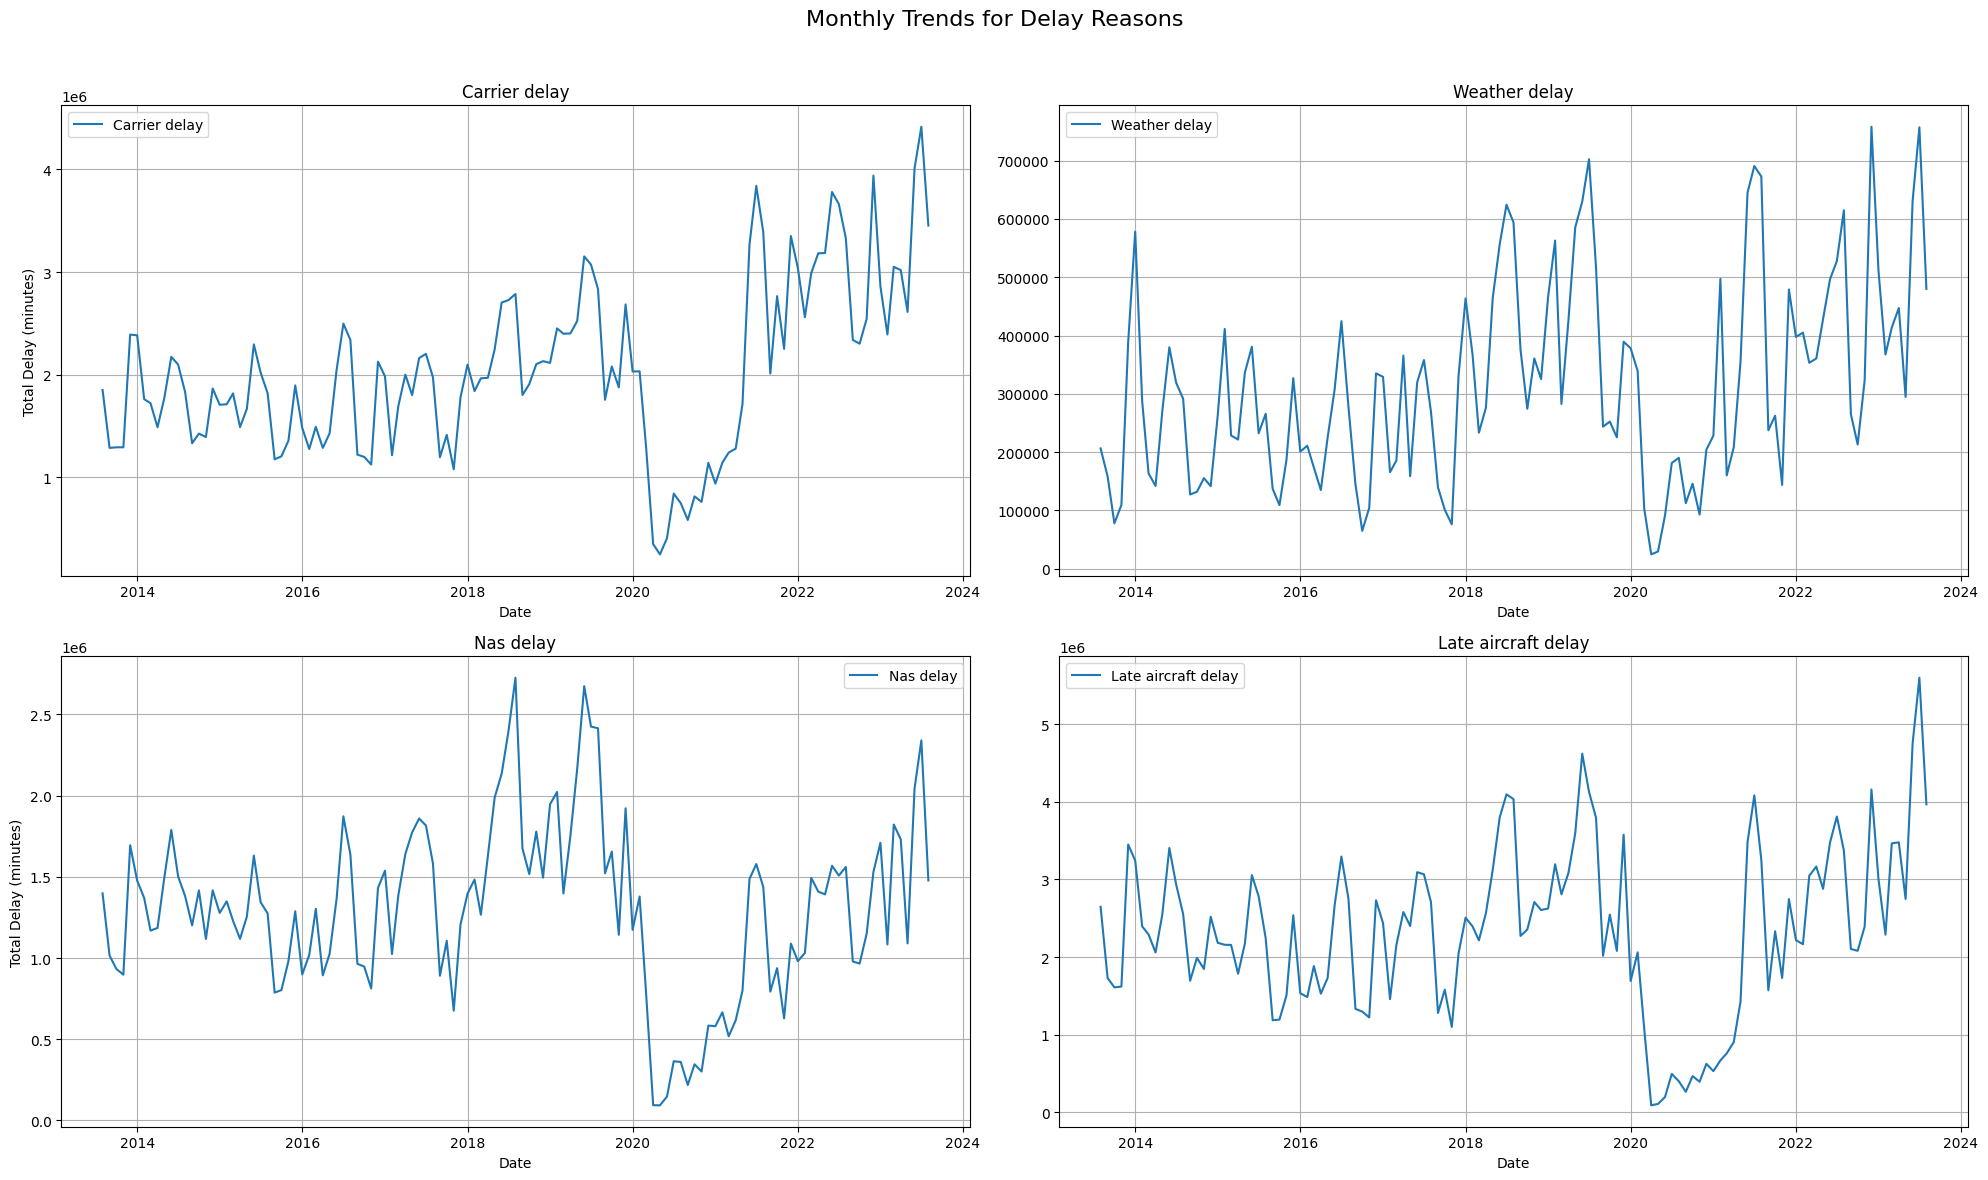

In [7]:
# Liste des colonnes correspondant aux raisons des retards
delay_reasons = ['carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']


# Fonction pour tracer les tendances mensuelles des retards totaux
def plot_monthly_trend(column, title, ylabel):
    trend_data = df.groupby(['year', 'month'])[column].sum().reset_index()
    trend_data['date'] = pd.to_datetime(trend_data[['year', 'month']].assign(day=1))
    plt.plot(trend_data['date'], trend_data[column], marker='o', label=title)

# Afficher tous les graphiques des raisons des retards en une grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Monthly Trends for Delay Reasons', fontsize=16)

for i, reason in enumerate(delay_reasons[:4]):  # Afficher uniquement 4 raisons sur 2x2
    ax = axes[i // 2, i % 2]
    trend_data = df.groupby(['year', 'month'])[reason].sum().reset_index()
    trend_data['date'] = pd.to_datetime(trend_data[['year', 'month']].assign(day=1))
    ax.plot(trend_data['date'], trend_data[reason], label=reason.replace("_", " ").capitalize())
    ax.set_title(f'{reason.replace("_", " ").capitalize()}')
    ax.set_xlabel('Date')
    if i % 2 == 0:
        ax.set_ylabel('Total Delay (minutes)')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Summary of the Four Charts:

1. **Carrier Delays**: Shows a steady increase after 2018, with a dip around 2020, likely due to the pandemic's effect on flight operations.
2. **Weather Delays**: Exhibits significant variability, influenced by seasonal weather conditions and not tied directly to flight volume trends.
3. **NAS Delays**: Peaks before 2020, followed by a notable decline during the pandemic, then a gradual increase as air traffic resumed.
4. **Security Delays**: Generally low but with sporadic spikes, indicating occasional security events impacting flights.

These visualizations help to identify distinct patterns and impacts for each type of delay over time.

### Comment on the Classification Report and Confusion Matrix:
The classification report and confusion matrix show excellent model performance:

- **Precision, Recall, and F1-Score**: Both classes (True and False) have a precision, recall, and F1-score of 1.00, indicating perfect predictions. This is highly unusual for real-world data and suggests the model may be overfitting.
- **Confusion Matrix**:
  - **True Positives (49286)** and **True Negatives (2128)** dominate, indicating the model correctly identifies delayed and non-delayed flights with almost no errors.
  - **False Positives (12)** and **False Negatives (2)** are minimal, showing that misclassifications are extremely rare.

### Insight:
While the performance appears perfect, it's important to ensure that the dataset isn't biased or that the model isn't overfitting. Cross-validation or testing on a different dataset would help confirm the model's generalizability.